In [21]:
import plotly
import plotly.plotly as py
from plotly.graph_objs import *
import pandas as pd
import math
from IPython.display import Image

plotly.tools.set_credentials_file(username='xjiang36', api_key='uZyWsdSH3xd9bxUefIFf')

# ASSUMPTIONS:
# 1.Data-set structure follows: 0NAME, 1DATE, 2LATITUED, 3LONGITUDE, 4CATEGORY, 5QUAN1, 6QUAN2, 7QUAN3,...QUANN.
# 2.SIZE
# 3.CATEGORY: TOP10 AND OTHERS

In [53]:
def Whaleteam(dataset='Q3-moreCtgSample.csv',topn=8,quantnum=1):
    colnum=quantnum+4
    df = pd.read_csv(dataset,encoding='iso-8859-1')
    colnames=df.columns.values
    freq=df[colnames[4]].value_counts().reset_index().rename(columns={'index': 'x'})
    freqcol=freq.columns.values
    # Top 10 category in colorful, others in grey
    colorbar=["#FF0000","#FF8000","#FFFF00","#00FF00","#00FFFF","#0080FF","#0000FF","#7F00FF","#FF00FF","#FF007F","#C0C0C0"]
    colorbars=[]
    for i in range(len(df[colnames[4]])):
        for j in range(len(freq)):
            if df[colnames[4]][i]==freq["x"][j]:
                if j<(topn):
                    colorbars.append(colorbar[j])
                else:
                    colorbars.append(colorbar[10])

    sizes=[]
    for i in range(len(df[colnames[colnum]])):
        if df[colnames[colnum]][i]>df[colnames[colnum]].median():
            if df[colnames[colnum]][i]>(df[colnames[colnum]][df[colnames[colnum]]>df[colnames[colnum]].median()].median()):
                sizes.append(15)
            else:
                sizes.append(9)
        else:
            if df[colnames[colnum]][i]>(df[colnames[colnum]][df[colnames[colnum]]<df[colnames[colnum]].median()].median()):
                sizes.append(6)
            else:
                sizes.append(3)

    colorbars1=[]
    for i in range(topn):
        colorbars1.append(colorbar[i])
    colorbars1.append(colorbar[10])
#topn=5         
    topfreq=freq[:(topn+1)]
    topfreq.set_value(topn,freqcol[0],"Other")
    topfreq.set_value(topn,freqcol[1],sum(freq[freqcol[1]][topn:]))

    locations = Bar(x=topfreq[freqcol[0]],y=freq[freqcol[1]], marker=dict(color=colorbars1))

    trace3 = {
      "geo": "geo3", 
      "lon": df[colnames[3]],
      "lat": df[colnames[2]],
      "hoverinfo": 'text',
      "marker": {
        "size": sizes,
        "opacity": 0.8,
        "color": colorbars,
        "colorscale": 'Viridis'
      }, 
      "mode": "markers", 
      "type": "scattergeo"
    }

    data = Data([locations, trace3])

    # control the subplot below using domain in 'geo', 'scene', and 'axis'
    layout = {
      "plot_bgcolor": 'black',
      "paper_bgcolor": 'black',
      "titlefont": {
          "size": 20,
          "family": "Raleway"
      },
      "font": {
          "color": 'white'
      },
      "dragmode": "zoom", 
      "geo3": {
        "domain": {
          "x": [0, 0.55], 
          "y": [0.18, 0.9]
        }, 
        "lakecolor": "rgba(127,205,255,1)",
        "oceancolor": "rgb(6,66,115)",
        "landcolor": 'white',
        "projection": {"type": "orthographic"}, 
        "scope": "world", 
        "showlakes": True,
        "showocean": True,
        "showland": True,
        "bgcolor": 'black'
      }, 
      "margin": {
        "r": 10, 
        "t": 25, 
        "b": 40, 
        "l": 60
      }, 
      "scene": {"domain": {
          "x": [0.5, 1], 
          "y": [0, 0.55]
        },
               "xaxis": {"gridcolor": 'white'},
               "yaxis": {"gridcolor": 'white'},
               "zaxis": {"gridcolor": 'white'}
               }, 
      "showlegend": False, 
      "title": "<br>Distribution of \"%s\" (top%s)" % (colnames[colnum],topn), 
      "xaxis": {
        "anchor": "y", 
        "domain": [0.6, 0.95]
      }, 
      "yaxis": {
        "anchor": "x", 
        "domain": [0.1, 0.9],
        "showgrid": False
      }
    }

    annotations = { "text": "Histrogram of \"%s\" (top%s)" % (colnames[colnum],topn),
                   "showarrow": False,
                   "xref": "paper",
                   "yref": "paper",
                   "x": 0.87,
                   "y": 0.95}

    annotations2 = { "text": "0%% to 25%%:%s to %s".ljust(30)%(round(df[colnames[colnum]].min(),4),round(df[colnames[colnum]][df[colnames[colnum]]<df[colnames[colnum]].median()].median(),4))+"<br>"+"25%% to 50%%:%s to %s".ljust(30)%(round(df[colnames[colnum]][df[colnames[colnum]]<df[colnames[colnum]].median()].median(),4),round(df[colnames[colnum]].median(),4))+"<br>"+"50%% to 75%%:%s to %s".ljust(30)%(round(df[colnames[colnum]].median(),4),round(df[colnames[colnum]][df[colnames[colnum]]>df[colnames[colnum]].median()].median(),4))+"<br>"+"75%% to 100%%:%s to %s".ljust(30)%(round(df[colnames[colnum]][df[colnames[colnum]]>df[colnames[colnum]].median()].median(),4),round(df[colnames[colnum]].max(),4)),
                   "showarrow": False,
                   "xref": "paper",
                   "yref": "paper",
                   "x": 0,
                   "y": 0}

    layout['annotations'] = [annotations,annotations2]

    fig = Figure(data=data, layout=layout)
    #py.iplot(fig, filename = "WhaleTeam data system diagram")
    #py.image.save_as(fig,"Histrogram of \"%s\" (top%s).png" % (colnames[colnum],topn))
    #Image("Histrogram of \"%s\" (top%s).png" % (colnames[colnum],topn))
    py.image.save_as(fig,'chris-plot.png')
    #Image('chris-plot.png')

In [54]:
Whaleteam()

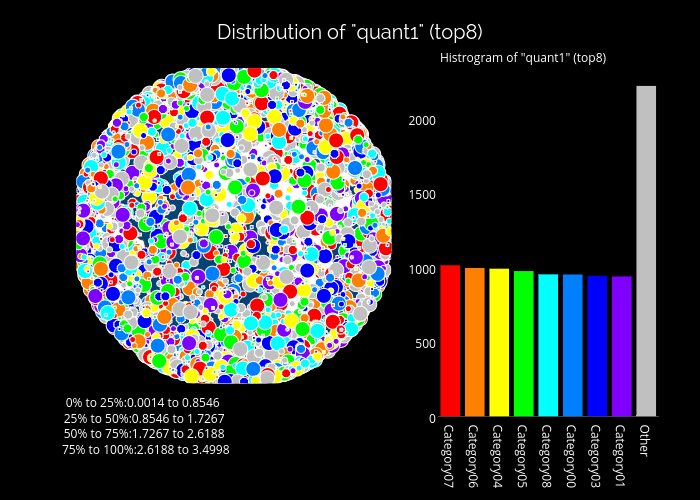

In [55]:
Image('chris-plot.png')

In [58]:
Whaleteam(topn=10,quantnum=2)

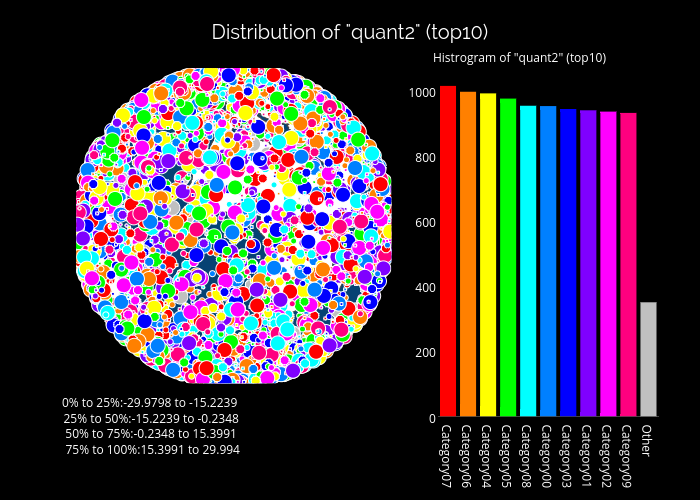

In [59]:
Image('chris-plot.png')

In [37]:
df = pd.read_csv("t3sample.csv",encoding='iso-8859-1')

In [43]:
dfdes=df.describe()

In [48]:
dfdes.columns[3]

'quant1'

In [52]:
dfdes[dfdes.columns[3]]

count    10000.000000
mean         1.737077
std          1.012192
min          0.001356
25%          0.854677
50%          1.726674
75%          2.618524
max          3.499813
Name: quant1, dtype: float64